# Redes neuronales

Una red neuronal es como un cerebro muy sencillo, hecho de matemáticas. Está foprmada por muchas neuronas artificiales, que son epqueñas unidades que hacen cálculos.

Cada neurona:
    Recibe datos(por ejemplo, los px(píxeles) de una imagen o de una tabla)
    Los multuiplica por unos valores llamados pesos (que indican que datos son mas importantes).
    Suma todo y aplica una función (que decide si el resultado "se activa" o no).
    Envia el resultado a las siguientes neuronas, generando una red neuronal.

La red tiene diferentes capas:
    Una capa de entrada (recibe datos).
    Varias capas ocultas (procesan la información).
    Una capa de salida (da el resultado final, como "es un perro" o "es un gato" dependiendo de x imagen).

Durante el entrenamiento, la red compara su respuesta con la correcta yu ajusta los pesos para mejorar. Esto se repite miles de veces hasta que aprende a acertar por si sola y por esto los algoritmos de deep learning necesitan muchos datos.

Resumen;
Una red neuronal aprende a reconocer patrones ajustando poco a poco sus propios números internos (pesos) según los errores que comete.

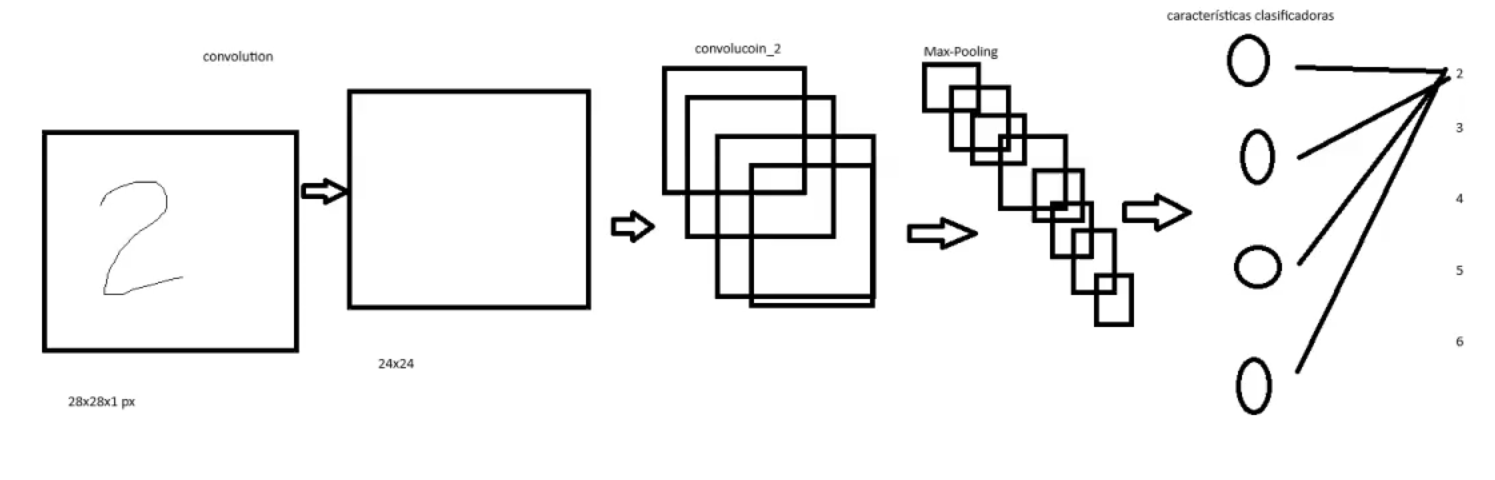

## Explicación Tensores y TensorFlow

#### Tensor:

Un tensor es una forma de guardar datos en varias dimensiones. Piensa en ello como la versión avanzada de lista o arreglo.

Ejemplos de datos - nivel de tensor:
    Un número --> es un tensor de 0 dimensiones(escalar) (5)
    Una lista de nº --> es un tensor de 1 dimension(vector) [1,2,3]
    Una tabla --> es un tensor de 2 dimensiones (matriz) (Ejemplo: Imagen en blanco y negro ([1,2],[3,4]))
    Una colección de tablas --> es un tensor de 3 o más dimensiones ("muchas imagenes") (Ejemplo: 3D: imagen con RGB, 4D: Colección de imagenes(video), 5D: Colección de videos; ...)

Los tensores son cajas de números ordenados que una red neuronal usa para calcular.

#### TensorFlow:

TensorFlow es una herramienta (libreria) creada por Google que:
    Crea y maneja tensores.
    Realiza operaciones matemáticas sobre ellos (sumas, mult, formulas, etc).
    Entrena redes neuronales de forma automática usando esos calculos.

En resumen: TensorFlow usa tensores (bloques de datos) para construir y entrenar redes neuronales.

Ejemplo práctico de comprensión:
    Cuantas más dimensiones, más complejo es tratar con la información: En Youtube se suben por minuto 500h, si suponemos que estan a 1080 son 2,073,600px y cada pixel tiene RGB (3 datos). Si multiplicamos todo esto, sale que Youtube procesa por minuto 37324800000 datos.

#### Procesamiento:

Capacidad de procesamiento cuidado porque el procesamiento del Tensor es muy pesado.

GPU(Tarjeta gráfica)
TPU(Tarjeta de tensores) La TPU es un "motor" especializado en cálculos de tensores, más rápido y eficiente que una GPU en muchas tareas de IA.

La TPU no se vende como hardware doméstico. Google las usa en sus centros de datos y las alquila a través de Google Cloud.

Si usas Google Colab funcionaras a partir de una TPU

#### ¿Ordenadores cuánticos?:

Son una nueva forma de computación que usa qubits en lugar de bits.

Un bit básico (como en CPU, GPU o TPU) solo puede valer o 0 o 1.
Un qubit puede valer 0 y 1 a la vez (superposición cuántica).
    Un ordenador cuático puede hacer muchisimos calculos a la vez, en lugar de uno por uno.

¿Qué relación tiene esto con las redes neuronales?
Hoy en día las rede neuronales usan:
    CPU --> Tareas normales
    GPU/TPU --> Acelerar calculos de tensores

En un futuro (ahora):
    Computadoras cuánticas para resolver problemas de IA.
        QML (Quantum Machine Learning) --> Combinar IA con computación cuántica.
        QNN (Quantum-Neutral Networks) --> Redes neuronales que usan qubits en lugar de neuronas básicas.


## Clasificación Múltiple con el Dataset MINST

¿Qué es?

MNIST es un conjunto de datos clásico usado para entrenar y probar redes neuronales. Contiene 70k en escala de grises de números escritos a mano del 0 al 9.

60k para entrenas.

10k para pruebas.

28x28x1px / imagen.

#### Crear un entorno donde funcione TensorFlow (Ejemplo: 3.10)
    conda create -n tf310 python=3.10 -y

#### Activar el nuevo entorno
    conda activate tf310

#### Actualizar el pip y luego instalar TensorFlow
    python -m pip install --upgrade pip 
    pip install tensorflow

#### Instalar jupyter e integrar este entorno como independiente en JupyterLab
    pip install jupyterlab ipykernel 
    python -m ipykernel install --user --name=tf310 --display-name "TensorFlow (py310)"

In [9]:
!conda activate tf310
!python -m pip install matplotlib

import sys
print(sys.executable)
!{sys.excutable} -m pip install --upgrade pip
!{sys.excutable} -m pip install matplotlib numpy pandas scikit-learn seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 11.6 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 12.1 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 11.4 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 10.8 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------- -------------------------- 2.4/7.0 MB 12.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.0/7.0 MB 12.1 MB/s eta 0:00:01
   -------------------------------------- - 6.8/7.0 MB 12.0 MB/s eta 0:00:01


"{sys.excutable}" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"{sys.excutable}" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Cargar el Dataset de MINST

IMportemos el mdoulo de MINST desde keras

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


Carguemos los datos a nuestras tuplas clásicas de Train y test

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Exploración de Datos

Obten el Shape de XTrain

In [4]:
X_train.shape

(60000, 28, 28)

Obten el Shape de yTrain

In [5]:
y_train.shape

(60000,)

Obten el Shape de XTest

In [6]:
X_test.shape

(10000, 28, 28)

Obten el Shape de yTrain

In [7]:
y_test.shape

(10000,)

Activa Matplotlib inline

In [10]:
%matplotlib inline

Importa matplotlib como plt

In [11]:
import matplotlib.pyplot as plt

Importa Seaborn

In [13]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

Pon su escala a 2

In [14]:
sns.set(font_scale = 2)

NameError: name 'sns' is not defined

Importa Numpy

In [15]:
import numpy as np

Ahora armate un programa que muestre 24 digitos

In [16]:
indice = np.random.choice(np.arange(len(X_train)), 24, repalce = False)

TypeError: choice() got an unexpected keyword argument 'repalce'

In [17]:
indice

NameError: name 'indice' is not defined

NameError: name 'indice' is not defined

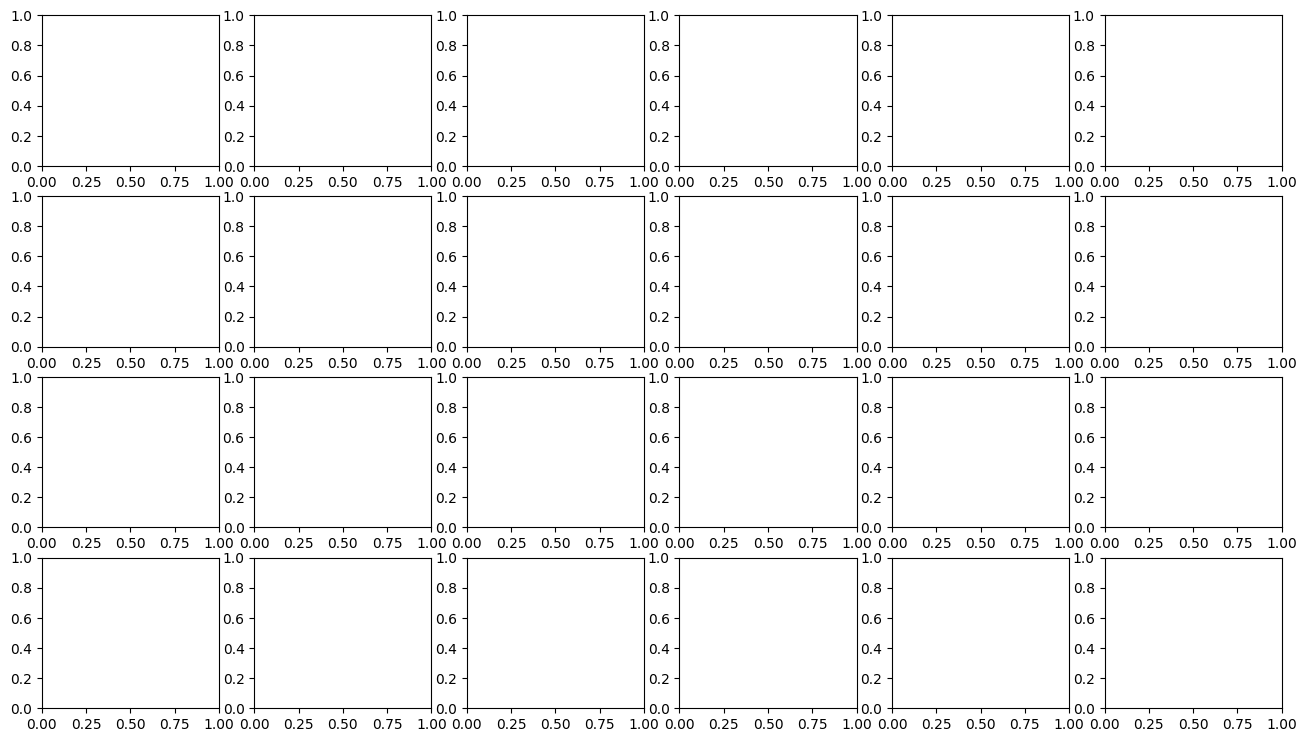

In [18]:
figure,axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16,9))

for item in zip(axes.ravel(), X_train[indice], y_train[indice]):
    axes, image, target = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_ysticks([])
    axes.set_tittle(target)
plt.tight_layout()

### Preparar los datos

Cambia la figura de Xtrain a 60000 x 28 x 28 x 1

Checa su shape

Cambia la figura de Xshape a 10000 x 28 x 28 x 1

Checa su Shape

Normaliza con astype Xtrain

Normaliza con astype Xtest

Desde tensorflow importa to_categorical

aplicalo a Y_train

Checa su shape

Checa el primer dato de Y_train

Aplica to_categorical a Y-test

Checa su figura

### Crear la Red Neuronal

Importa Sequential desde tf

Crea tu objeto cnn

importa las capas que necesitaras desde tf

agrega la capa de Conv2d

Ahora agrega una capa de Pooling2d

Agrega otra caba de Conv2D

Y otra de Pooling

Aplana los resultados

In [ ]:
cnn.add(Flatten())

Agrega una capa DENSE

Y otra DENSE

Imprime el resultado en un resumen

Visualiza la estructura del modelo

Compila tu modelo

### Entrenar y Evaluar el modelo

Entrena tu modelo con fit

Evalua le modelo con Evaluate

Vamos a hacer predicciones

checa que dice el primer elemento de ytest

Y ahora que dice el primer elemento del modelo

Ubiquemos las predicciones incorreectas

Obten el largo de esa lista

Visualiza las predicciones incorrectas

Arma una funcion que genere un listado de las probabilidades para predicciones incorrectas

Muestra una que otra predicción incorrecta a detalles

### Guardar tu Modelo

## Analisis de Sentimientos con Redes Neuronales - IMDB

### Cargar el dataset de IMBD

Import el dataset de imdb desde tensorlfow.keras.datasets

Carga las 10000 palabras que mas ocurren

Carga tus palabras en tus datasets X_train y X_test y asi

### Exploracion de Datos

Figura de X_train

Figura de Y_train

Figura de X_test

Figura de y_test

Apaga pretty print

Checa un elemento cualquiera de X_train

Llama la función word to index

Checa el indice de la palabra "bad"

Reversa el mapeo del diccionario Word to INdex a Index to Word

Armate una lista para revisar las 50 palabras mas comunes en el diccionario

Ok, ya estamos listos para leer una reseña

Y revisa de Y_train la clasificacion de esta reseña

### Preparación de datos

Define palabras_por_reseña en 200

Importa pad_sequences de tensroflow

Define X_train como pad_sequences del viejo X_train

Checa el nuevo shape de X_train

Hay que reconfigurar X_Test tambien

Checa su figura

Importa el Train_test_split y definelo sobre tus variables, semilla 11 y tamaño de prueba de .20

Checa la figura de xtest

Y la de XVal

### Crear la red neuronal

Desde Tensorflow importa Sequencial

arma el objeto rnn com oun sequential

Importa las capas Dense y LSTM

Importa Embedding

Agrega la capa de Embedding, que salgan 128 dimensiones

agrega la capa de LSTM

Agrega una capa DENSE

Compila el RNN

Y resvisa el resultado de RNN

### Entrenar y evaluar el modelo

Usa Fit para entrenar el mdoelo

Checa tus resultados

Y revisa el resultado